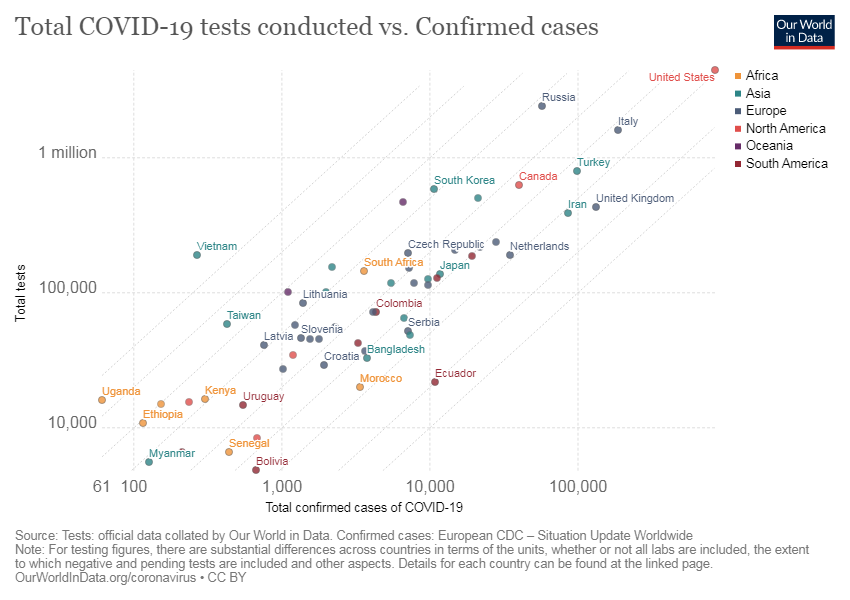

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

# **Loading the datasets**

In [ ]:
train_data = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-3/train.csv")
test_data = pd.read_csv("/kaggle/input/covid19-global-forecasting-week-3/test.csv")

# > **Importing important libraries**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
import plotly.express as px
%matplotlib inline


# **looking at the head of training dataset **

In [ ]:
train_data.head()


# **head of the test dataset**

In [ ]:
test_data.head()

# **shapes of training and testing datasets**
# we have a large dataset containing 23562 training examples

In [ ]:
train_data.shape

In [ ]:
test_data.shape

# Province_State column has lots of NAN values , just we'll drop this column 

In [ ]:
train =train_data.drop(["Province_State"] , axis = 1)
test =test_data.drop(["Province_State"] , axis = 1)


In [ ]:
train.head()

**In confirmed_cases column we have lot of zero values , filtering the dataframe and considering only nonzero values **

In [ ]:
train = train[train["ConfirmedCases"] != 0]

# Filling null values and grouping the dataset and considering only top 10 countries

In [ ]:
df = train.fillna('NA').groupby(['Country_Region','Date'])['ConfirmedCases'].sum() \
                          .groupby(['Country_Region']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

top10 = pd.DataFrame(df).head(10).reset_index()
top10

**As we can see that USA has highest number of confirmed cases.**

In [ ]:
deaths = train.fillna('NA').groupby(['Country_Region','Date'])['Fatalities'].sum() \
                          .groupby(['Country_Region']).max().sort_values() \
                          .groupby(['Country_Region']).sum().sort_values(ascending = False)

deaths10 = pd.DataFrame(deaths).head(10).reset_index()
deaths10

# USA has the highest number of confirmed cases but ITALY has highest death rate

In [ ]:
px.bar(top10 , x="Country_Region" , y="ConfirmedCases" , color = "ConfirmedCases")

In [ ]:
px.bar(deaths10 , x = "Country_Region" , y = "Fatalities" , color = "Fatalities")

In [ ]:
data_by_date = pd.DataFrame(train.groupby(["Country_Region" , "Date"])["ConfirmedCases"].sum())
data_by_date = data_by_date.sort_values("ConfirmedCases" , axis=0 , ascending = True).reset_index()

In [ ]:
data_by_date.head()

In [ ]:
death_by_date = pd.DataFrame(train.groupby(["Country_Region" , "Date"])["Fatalities"].sum())
death_by_date = death_by_date.sort_values("Fatalities" , axis=0 , ascending = False).reset_index()

In [ ]:
death_by_date.head(10)

# looking at the dataset of USA only.

In [ ]:
df = data_by_date.loc[(data_by_date['Country_Region'] == 'US') &(data_by_date.Date >= '2020-03-01')]
df = df.sort_values('ConfirmedCases',ascending = True)

In [ ]:
px.bar(df , x = 'Date' ,  y ="ConfirmedCases" , color = "ConfirmedCases")

In [ ]:
death_US = death_by_date.loc[(death_by_date['Country_Region'] == 'US') &(death_by_date.Date >= '2020-03-01')]
death_US = death_US.sort_values('Fatalities',ascending = True)

In [ ]:
fig3 = px.bar(death_US , x = "Date" , y = "Fatalities" , color = "Fatalities")
fig3.update_layout(title_text = "daywise deaths in US")
fig3.show()

# As we can see that the cases and the deathrate in USA in increasing rapidly.

In [ ]:
data_china = data_by_date.loc[(data_by_date["Country_Region"] == "China") & (data_by_date["Date"] >= "2020-01-01")]

In [ ]:
data_china.sort_values("ConfirmedCases" , ascending = True)
plot_china = px.bar(data_china , x = "Date" , y = "ConfirmedCases" )
plot_china.show()

In [ ]:
death_china = death_by_date.loc[(death_by_date["Country_Region"] == "China") & (death_by_date["Date"] >= "2020-01-01")]
death_china.sort_values("Fatalities" , ascending = True)

In [ ]:
fig4 = px.bar(death_china , x = "Date" , y = "Fatalities" )
fig4.update_layout(title_text = "deaths in China")
fig4.show()

# As we can see the number of cases and the death rate increased in CHINA suddenly but now the situation is in control. slope of the graph in decreasing now.

In [ ]:
data_italy = data_by_date.loc[(data_by_date["Country_Region"] == "Italy" ) & (data_by_date["Date"] >= "2020-02-21")]
data_italy = data_italy.sort_values("ConfirmedCases" , ascending = False)
plot_italy = px.bar(data_italy , x = "Date" , y = "ConfirmedCases" , color = "ConfirmedCases" , color_continuous_scale=px.colors.sequential.Brwnyl)
plot_italy.update_layout(title_text = "cases in ITALY")
plot_italy.show()

In [ ]:
death_italy = death_by_date.loc[(death_by_date["Country_Region"] == "Italy" ) & (death_by_date["Date"] >= "2020-02-21")]
death_italy = death_italy.sort_values("Fatalities" , ascending = False)
fig5 = px.bar(death_italy , x = "Date" , y = "Fatalities" , color = "Fatalities" , color_continuous_scale=px.colors.sequential.Brwnyl)
fig5.update_layout(title_text = "deaths in ITALY")
fig5.show()

# Death rate in ITALY is highest.

In [ ]:
data_india = data_by_date.loc[(data_by_date["Country_Region"]=="India") & (data_by_date["Date"]>= "2020-03-03")]
data_india = data_india.sort_values("ConfirmedCases" , ascending = True)
plot_india = px.bar(data_india , x = "Date" , y = "ConfirmedCases" , color = "ConfirmedCases")
plot_india.show()

In [ ]:
death_india = death_by_date.loc[(death_by_date["Country_Region"]=="India") & (death_by_date["Date"]>= "2020-03-03")]
death_india = death_india.sort_values("Fatalities" , ascending = True)
fig_india = px.bar(death_india , x = "Date" , y = "Fatalities" , color = "Fatalities")
fig_india.show()

# #Prediction process

# Loading the datasets 

In [ ]:
 # Load Data
x_train = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-3/train.csv')
x_test = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-3/test.csv')
x_submission = pd.read_csv('/kaggle/input/covid19-global-forecasting-week-3/submission.csv')

# renaming columns.

In [ ]:
x_train.rename(columns={'Country_Region':'country'}, inplace=True)
x_test.rename(columns={'Country_Region':'country'}, inplace=True)

x_train.rename(columns={'Province_State':'state'}, inplace=True)
x_test.rename(columns={'Province_State':'state'}, inplace=True)

x_train['date'] = pd.to_datetime(x_train['Date'], infer_datetime_format=True)
x_test['date'] = pd.to_datetime(x_test['Date'], infer_datetime_format=True)



EMPTY_VAL = "EMPTY_VAL"

def fillState(state, country):
    if state == EMPTY_VAL: return country
    return state

# Filling the null values in training and testing set. state column by country column 

In [ ]:


x_train['state'].fillna(EMPTY_VAL, inplace=True)
x_train['state'] = x_train.loc[:, ['state', 'country']].apply(lambda x : fillState(x['state'], x['country']), axis=1)

x_train.loc[:, 'date'] = x_train.date.dt.strftime("%m%d")
x_train["date"]  = x_train["date"].astype(int)


x_test['state'].fillna(EMPTY_VAL, inplace=True)
x_test['state'] = x_test.loc[:, ['state', 'country']].apply(lambda x : fillState(x['state'], x['country']), axis=1)

x_test.loc[:, 'date'] = x_test.date.dt.strftime("%m%d")
x_test["date"]  = x_test["date"].astype(int)



# #preprocessing part

**using labelEncoder for country and state column **

In [ ]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()

x_train.country = le.fit_transform(x_train.country)
x_train['state'] = le.fit_transform(x_train['state'])


x_test.country = le.fit_transform(x_test.country)
x_test['state'] = le.fit_transform(x_test['state'])


In [ ]:
from warnings import filterwarnings
filterwarnings('ignore')

# x_out file for the submission 


In [ ]:
# Predict data and Create submission file from test data
xout = pd.DataFrame({'ForecastId': [], 'ConfirmedCases': [], 'Fatalities': []})

# using XGBRegressor

In [ ]:
from xgboost.sklearn import XGBRegressor

In [ ]:
countries = x_train.country.unique()

In [ ]:
for i in countries:
    states = x_train.loc[x_train.country == i, :].state.unique()
    #print(country, states)
    # check whether string is nan or not
    for j in states:
        x_train_m = x_train.loc[(x_train.country == i) & (x_train.state == j), ['state', 'country', 'date', 'ConfirmedCases', 'Fatalities']]
        
        y_train_cases = x_train_m.loc[:, 'ConfirmedCases']
        y_train_fata = x_train_m.loc[:, 'Fatalities']
        
        x_train_all = x_train_m.loc[:, ['state', 'country', 'date']]
        
        x_train_all.country = le.fit_transform(x_train_all.country)
        x_train_all['state'] = le.fit_transform(x_train_all['state'])
        
        X_xTest_CS = x_test.loc[(x_test.country == i) & (x_test.state == j), ['state', 'country', 'date', 'ForecastId']]
        
        X_xTest_CS_Id = X_xTest_CS.loc[:, 'ForecastId']
        X_xTest_CS = X_xTest_CS.loc[:, ['state', 'country', 'date']]
        
        X_xTest_CS.country = le.fit_transform(X_xTest_CS.country)
        X_xTest_CS['state'] = le.fit_transform(X_xTest_CS['state'])
        
        xmodel1 = XGBRegressor(n_estimators=1000)
        xmodel1.fit(x_train_all,y_train_cases )
        y1_xpred = xmodel1.predict(X_xTest_CS)
        
        xmodel2 = XGBRegressor(n_estimators=1000)
        xmodel2.fit(x_train_all, y_train_fata)
        y2_xpred = xmodel2.predict(X_xTest_CS)
        
        xdata = pd.DataFrame({'ForecastId': X_xTest_CS_Id, 'ConfirmedCases': y1_xpred, 'Fatalities': y2_xpred})
        xout = pd.concat([xout, xdata], axis=0)

In [ ]:
xout.head(10)

In [ ]:
xout.ForecastId = xout.ForecastId.astype('int')
xout.tail()
xout.to_csv('submission.csv', index=False)